# Predicting Car Prices

#### Darren Ho

## Introduction

In this project, we'll practice the ML workflow we have learned so far to predict a car's market price using its attributes. The dataset contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile), and can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) 

In [1]:
# import dataset
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# have to pass column names because of .data file 
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [3]:
# determining which columns are numeric and can be used as features
# check dataset documentation for which cols are continuous 

numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars_numeric_only = cars[numeric_cols]
cars_numeric_only.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

We cannot have any missing values if we want to use these columns for predictive modeling. Based on the first few rows we displayed, we see that the `normalized-losses` column contains missing values represented by a `?`.   

In [4]:
# replacing all ? with nan missing value
cars_numeric_only = cars_numeric_only.replace('?', np.nan)
cars_numeric_only.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars_numeric_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
# convert object types to floats since they are continuous

cars_numeric_only = cars_numeric_only.astype('float')
cars_numeric_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [7]:
# count null values in columns

cars_numeric_only.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# we want to predict price, so we get rid of missing values
cars_numeric_only = cars_numeric_only.dropna(subset=['price'])
cars_numeric_only.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# counting what percentage of null values make up total column values

null_percentage = cars_numeric_only.isnull().sum().divide(cars_numeric_only.shape[0]).multiply(100)

null_percentage.loc[null_percentage > 0]

normalized-losses    18.407960
bore                  1.990050
stroke                1.990050
horsepower            0.995025
peak-rpm              0.995025
dtype: float64

In [10]:
# drop the normalized-losses column all together

cars_numeric_only = cars_numeric_only.drop(['normalized-losses'], axis=1)
cars_numeric_only.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [11]:
# because the remaining NA values only accounted for less than 2% of total values in their respective
# column, we will just fill the NAs with the mean

cars_numeric_only = cars_numeric_only.fillna(cars_numeric_only.mean())
cars_numeric_only.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [12]:
cars_numeric_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
wheel-base          201 non-null float64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
curb-weight         201 non-null float64
engine-size         201 non-null float64
bore                201 non-null float64
stroke              201 non-null float64
compression-rate    201 non-null float64
horsepower          201 non-null float64
peak-rpm            201 non-null float64
city-mpg            201 non-null float64
highway-mpg         201 non-null float64
price               201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


In [13]:
# normalizing df so values range from 0 to 1, except for price because dependent variable

normalized_cars = (cars_numeric_only - cars_numeric_only.min())/(cars_numeric_only.max() - cars_numeric_only.min())
normalized_cars['price'] =  cars_numeric_only['price']
normalized_cars.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


We began the data cleaning by replacing all of the `?` values with `NaN`values. Because `?` is a string value, columns containing it were cast to the pandas `object` data type, so after we replaced the `?` values, we converted the object columns to a numeric type. We then counted the amount of `NaN` values that were left in the dataset, where we decided to drop the 4 `NaN` rows from the price column, in addition to completely dropping the `normalized-losses` column. With the remaining `NaN` values in the dataset, we decided to fill those values with the column means as they only accounted for less than 2% of the total rows in their respective column. We finished off this section by normalizing the numeric columns so all values range from `0` to `1`.   

## Univariate Model

We can begin predicting car prices. Let's start with some univariate k-nearest neighbors models.

In [14]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor(algorithm='brute')
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = normalized_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size         3216.836576
horsepower          4032.384802
curb-weight         4400.623175
width               4650.528354
city-mpg            4830.919061
highway-mpg         4894.959095
length              5422.194354
wheel-base          5510.424430
compression-rate    6840.976896
bore                6992.745784
peak-rpm            7295.489962
height              7764.001175
stroke              8289.581568
dtype: float64

We created a function that split the dataframe into a training and test set. Then we instantiated the KneighborsRegressor class, fit the model on the training set, and made predictions on the test set. We then calculated the RMSE (root mean square error).

We used the function to train and test univariate models using the different numeric columns in our dataset (minus the `price` column because that's what we're trying to predict). At a default neighbors value of `k=5`, the `engine-size` column performed the best as it had the lowest RMSE value of approximately 3217. On the other hand, `stroke` performed the worst as it had the highest RMSE value of approximately 8290. 

We'll modify the function now to accept a paramater for the `k` value.

In [15]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = normalized_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 7554.9512176446315,
  3: 6870.122285026746,
  5: 6992.745783685227,
  7: 6846.130978887037,
  9: 6932.63573820032},
 'city-mpg': {1: 4999.6926667922535,
  3: 4665.399526693761,
  5: 4830.9190611975255,
  7: 5156.33162181214,
  9: 5324.822735078125},
 'compression-rate': {1: 7917.579731956047,
  3: 6319.886594524997,
  5: 6840.976895643827,
  7: 6614.376984425625,
  9: 6747.419859657354},
 'curb-weight': {1: 5496.150727716825,
  3: 5055.228940548997,
  5: 4400.6231752215535,
  7: 4367.669511999935,
  9: 4634.055301484907},
 'engine-size': {1: 3475.2810813025476,
  3: 2790.45642413665,
  5: 3216.8365762064755,
  7: 3631.9860373729207,
  9: 3782.8088507736234},
 'height': {1: 8931.134984917195,
  3: 8025.141653986966,
  5: 7764.001175417297,
  7: 7613.249014705291,
  9: 7664.919593082149},
 'highway-mpg': {1: 6308.517418522515,
  3: 4686.072257255539,
  5: 4894.959094844207,
  7: 5144.27150086394,
  9: 5274.5968079437935},
 'horsepower': {1: 3625.4304121396854,
  3: 4028.6051

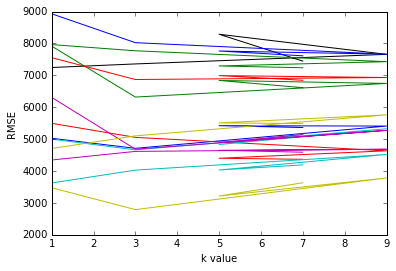

In [16]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


## Multivariate Model

Let's now modify the function to work with multiple columns.

In [17]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size         3379.473794
horsepower          4079.703746
width               4577.088948
curb-weight         4790.745531
city-mpg            4995.433122
length              5186.979470
highway-mpg         5261.683416
wheel-base          5314.612010
compression-rate    6888.048013
bore                7039.317201
peak-rpm            7540.137696
stroke              7600.418476
height              7999.689284
dtype: float64


In [18]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars
    )

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3360.832156381264}}

We first sorted the columns by lowest to highest RMSE, and that allowed us to rank each column in terms of performance. We then modified the function to accept a list of column names instead of just a string, as well as modified the k value back to a default value of 5.

From there, we used the function to use the best 2 features we sorted by, followed by the 3 best features, and so on, until we used our 5 best features. We displayed the RMSE values with the respective number of features preceding it. 

## Hyperparameter Tuning

Let's now optimize the model that performed the best in the last step.

In [19]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 26)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.21649

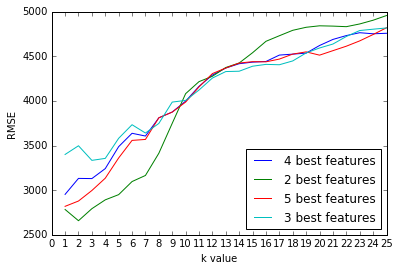

In [20]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.xticks(np.arange(0, 26, step=1))
plt.legend(loc='best')

For the top 3 model in the last step, we varied the hyperparameter value from `1` to `25` and plotted the resulting RMSE values.

## Conclusion

In this project, we practiced using the K-Nearest Neighbors algorithm where we used the test/train validation. We first ran univariate models to see how they performed in predicting a car's price. We then carried over the methods to run multivariate models, where we found:

- The 5 best features to predict a car's price: 
    - engine-size         
    - horsepower          
    - width              
    - curb-weight        
    - city-mpg   
- `K` = 2 is the value most optimal in getting a model with the lowest RMSE 

## Next Steps

Some ideas for the next steps:

- Modify function to use k-fold cross validation instead of test/train validation
- Modify function to perform the data cleaning